# Introduction

This notebook will simulate the work of an analyst that wants to classify clothes for an e commerce. The classification aims to automate the process when someone posts a picture of certain clothes, returning the type of the clothes.

4422102/4422102 [==============================] - 0s 0us/step
The total images for training are: 60000
The total labels for training are: 60000
The total images for testing are: 10000
The total labels for testing are: 10000
The total classes are: 10 



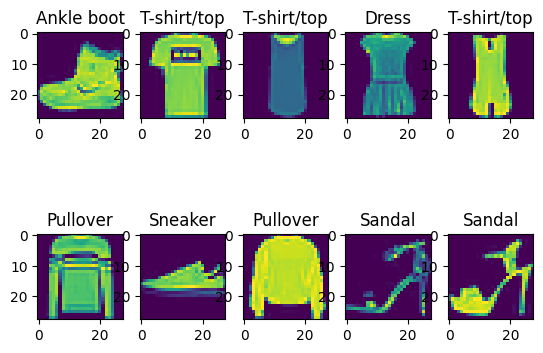

In [1]:
import tensorflow
from tensorflow import keras
data = keras.datasets.fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

((train, labels_train),(test, labels_test)) = data.load_data()

print('The total images for training are:',len(train))
print('The total labels for training are:',len(labels_train))
print('The total images for testing are:',len(test))
print('The total labels for testing are:',len(labels_test))


Classes_names= ['T-shirt/top','Trouser','Pullover', 'Dress',
                'Coat', 'Sandal',	'Shirt',	'Sneaker','Bag',
                'Ankle boot'] #this list is based on the dataset fashion MNIST
print("The total classes are:", len(Classes_names),'\n')
for i in range(len(Classes_names)):
  plt.subplot(2,5,i+1)
  plt.imshow(train[i])
  plt.title(Classes_names[labels_train[i]])

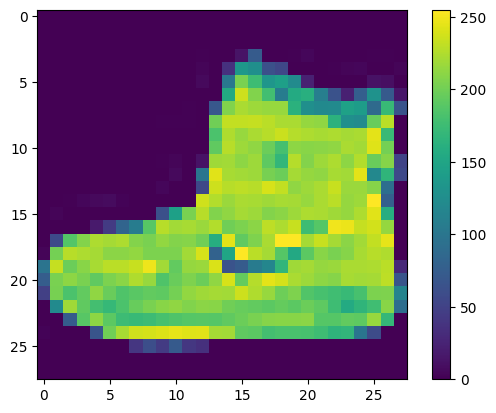

In [36]:
plt.imshow(train[0])
plt.colorbar()

# The model: Input, processing and output


The cells below have '''...''' because their execution will create and save some variables that one does not want to create with a "bad model". Read the outputs and texts below to better understand.

In [37]:
'''model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #input layer
    keras.layers.Dense(256, activation=tensorflow.nn.relu), #based on the color bar different colors
    keras.layers.Dense(len(Classes_names), activation=tensorflow.nn.softmax) #output layer returning the probability for each class
    ])'''

'model = keras.Sequential([\n    keras.layers.Flatten(input_shape=(28,28)), #input layer\n    keras.layers.Dense(256, activation=tensorflow.nn.relu), #based on the color bar different colors\n    keras.layers.Dense(len(Classes_names), activation=tensorflow.nn.softmax) #output layer returning the probability for each class\n    ])'

At the second layer, the ReLU (rectified linear unit) function is commonly used when data tends to behave in a nonlinear way. Clothes are inputted as images, so they are non linear in nature.
In the third layer one has the number of classes and the return of each neuron will detemrine which image correspond to that class. A softmax function will be necessary.

In [38]:
'''model.compile(optimizer='adam', loss='sparse_categorical_crossentropy' )
model.fit(train, labels_train)'''

"model.compile(optimizer='adam', loss='sparse_categorical_crossentropy' )\nmodel.fit(train, labels_train)"

Adam (short for Adaptive Moment Estimation) is a popular optimization algorithm used for image classification. It combines the advantages of two other optimization methods: AdaGrad and RMSprop.

The sparse categorical cross-entropy loss is commonly used used in cases like this of image classification. This type of loss is used because of the categorical nature of the problem,
efficient representation of labels and its computational efficiency.

## Reducing the loss (normalization)

A simple convertion of int to float, will cause a reduction of the loss. The scale of the data is too big from 0 to 255 colors. Reducing that scale to a number between 0 and 1, will make it easier for one to estimate that number.

In [39]:
'''train= train/255.0 #converting the train to float values

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #input layer
    keras.layers.Dense(256, activation=tensorflow.nn.relu), #based on the color bar different colors
    keras.layers.Dense(len(Classes_names), activation=tensorflow.nn.softmax) #output layer returning the probability for each class
    ])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy' )
model.fit(train, labels_train)'''

"train= train/255.0 #converting the train to float values\n\nmodel = keras.Sequential([\n    keras.layers.Flatten(input_shape=(28,28)), #input layer\n    keras.layers.Dense(256, activation=tensorflow.nn.relu), #based on the color bar different colors\n    keras.layers.Dense(len(Classes_names), activation=tensorflow.nn.softmax) #output layer returning the probability for each class\n    ])\n\nmodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy' )\nmodel.fit(train, labels_train)"

The normalization improved the model, since the loss was significantly reduced.

## Making the model deeper

In [40]:
'''train= train/255.0 #converting the train to float values

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #input layer
    keras.layers.Dense(256, activation=tensorflow.nn.relu), #based on the color bar different colors
    keras.layers.Dense(128, activation=tensorflow.nn.relu),
    keras.layers.Dense(len(Classes_names), activation=tensorflow.nn.softmax) #output layer returning the probability for each class
    ])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy' )
model.fit(train, labels_train)'''

"train= train/255.0 #converting the train to float values\n\nmodel = keras.Sequential([\n    keras.layers.Flatten(input_shape=(28,28)), #input layer\n    keras.layers.Dense(256, activation=tensorflow.nn.relu), #based on the color bar different colors\n    keras.layers.Dense(128, activation=tensorflow.nn.relu),\n    keras.layers.Dense(len(Classes_names), activation=tensorflow.nn.softmax) #output layer returning the probability for each class\n    ])\n\nmodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy' )\nmodel.fit(train, labels_train)"

A deeper model, with worse results? How? An extra hidden layer might worsen the model, because of the information they retain and make them more specialized in that information. This is also known as Overfitting. Another reason for that might be gradient vanishing when the gradients used for updating the network's weights can diminish. An increased parameter sensitivity could make the network more sensitive to small changes in input data, which can lead to increased loss values. The model may struggle to find the optimal set of parameters and exhibit higher training loss. Finally, difficulty in optimization, since there will be more 'valleys' of optimum performance the model will have a hard time knowing its way to the top

What if one adds another layer?

In [41]:
'''train= train/255.0 #converting the train to float values

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #input layer
    keras.layers.Dense(256, activation=tensorflow.nn.relu), #based on the color bar different colors
    keras.layers.Dense(128, activation=tensorflow.nn.relu),
    keras.layers.Dense(64, activation=tensorflow.nn.relu),
    keras.layers.Dense(len(Classes_names), activation=tensorflow.nn.softmax) #output layer returning the probability for each class
    ])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy' )
model.fit(train, labels_train)'''

"train= train/255.0 #converting the train to float values\n\nmodel = keras.Sequential([\n    keras.layers.Flatten(input_shape=(28,28)), #input layer\n    keras.layers.Dense(256, activation=tensorflow.nn.relu), #based on the color bar different colors\n    keras.layers.Dense(128, activation=tensorflow.nn.relu),\n    keras.layers.Dense(64, activation=tensorflow.nn.relu),\n    keras.layers.Dense(len(Classes_names), activation=tensorflow.nn.softmax) #output layer returning the probability for each class\n    ])\n\nmodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy' )\nmodel.fit(train, labels_train)"

It got even worse and a stabilization of the loss was noticed. More layers also increase the training time. In this classification, one layer will be used, since it will perform better.

In [42]:
'''#this is the best model
train= train/255.0 #converting the train to float values
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #input layer
    keras.layers.Dense(256, activation=tensorflow.nn.relu), #based on the color bar different colors
    keras.layers.Dense(len(Classes_names), activation=tensorflow.nn.softmax) #output layer returning the probability for each class
    ])'''



'#this is the best model\ntrain= train/255.0 #converting the train to float values\nmodel = keras.Sequential([\n    keras.layers.Flatten(input_shape=(28,28)), #input layer\n    keras.layers.Dense(256, activation=tensorflow.nn.relu), #based on the color bar different colors\n    keras.layers.Dense(len(Classes_names), activation=tensorflow.nn.softmax) #output layer returning the probability for each class\n    ])'

In [43]:
'''model.compile(optimizer='adam', loss='sparse_categorical_crossentropy' )
model.fit(train, labels_train)'''

"model.compile(optimizer='adam', loss='sparse_categorical_crossentropy' )\nmodel.fit(train, labels_train)"

# Training the model

In [44]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #input layer
    keras.layers.Dense(256, activation=tensorflow.nn.relu), #based on the color bar different colors
    keras.layers.Dense(len(Classes_names), activation=tensorflow.nn.softmax) #output layer returning the probability for each class
    ])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(train, labels_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 3.3449
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5672
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5184
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5058
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4789


The training decreased the loss, but how much accuracy the model has?

In [45]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train, labels_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4896 - accuracy: 0.8384
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4814 - accuracy: 0.8389
Epoch 3/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.4561 - accuracy: 0.8459
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4543 - accuracy: 0.8462
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4474 - accuracy: 0.8485


Another 5 epochs resulted in a decrease of the loss and an increase in the accuracy. This is good news!

So 10 epochs are the limit of the model's optimization?

## Predicting and testing

In [46]:
testing = model.predict(test)
print('The test resulted in the image:', np.argmax(testing[0]))
print('While the  real number of the image is=', labels_test[0])

313/313 [==============================] - 1s 4ms/step
The test resulted in the image: 9
While the  real number of the image is= 9


The model correctly predicted the class of the image in the position 0.

## Model evaluation

In [47]:
loss_test, acc_test = model.evaluate(test, labels_test)
print(f'Test los was {loss_test:.2f}, and test accuracy was {acc_test*100:.2f}')

313/313 [==============================] - 1s 2ms/step - loss: 0.5044 - accuracy: 0.8307
Test los was 0.50, and test accuracy was 83.07


This model needs to be validated, to make sure that it is good enough.

In [48]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
training = model.fit(train, labels_train, epochs=5, validation_split=0.2)
training

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4604 - accuracy: 0.8446 - val_loss: 0.4234 - val_accuracy: 0.8603
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4403 - accuracy: 0.8516 - val_loss: 0.6154 - val_accuracy: 0.8142
Epoch 3/5
1500/1500 [==============================] - 10s 6ms/step - loss: 0.4372 - accuracy: 0.8517 - val_loss: 0.4876 - val_accuracy: 0.8303
Epoch 4/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4332 - accuracy: 0.8540 - val_loss: 0.5339 - val_accuracy: 0.8374
Epoch 5/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4407 - accuracy: 0.8516 - val_loss: 0.4656 - val_accuracy: 0.8540


In [49]:
training.history

{'loss': [0.46035197377204895,
  0.44029757380485535,
  0.43719735741615295,
  0.4331617057323456,
  0.44071462750434875],
 'accuracy': [0.8446458578109741,
  0.8516250252723694,
  0.8516666889190674,
  0.8540416955947876,
  0.8515833616256714],
 'val_loss': [0.42342090606689453,
  0.6153720617294312,
  0.48758089542388916,
  0.5338597893714905,
  0.4655591547489166],
 'val_accuracy': [0.8603333234786987,
  0.8141666650772095,
  0.8303333520889282,
  0.8374166488647461,
  0.8539999723434448]}

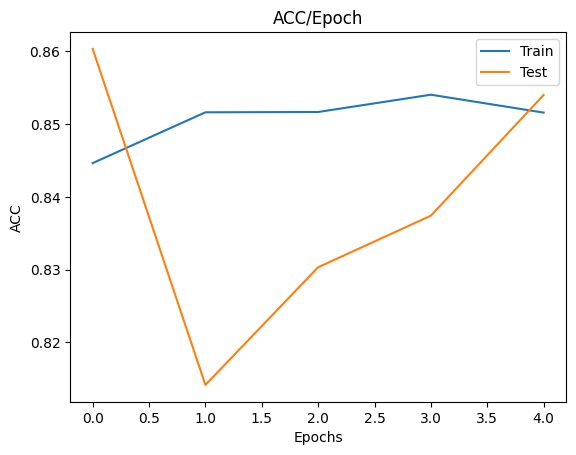

In [50]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('ACC/Epoch')
plt.xlabel('Epochs')
plt.ylabel('ACC')
plt.legend(['Train', 'Test'])

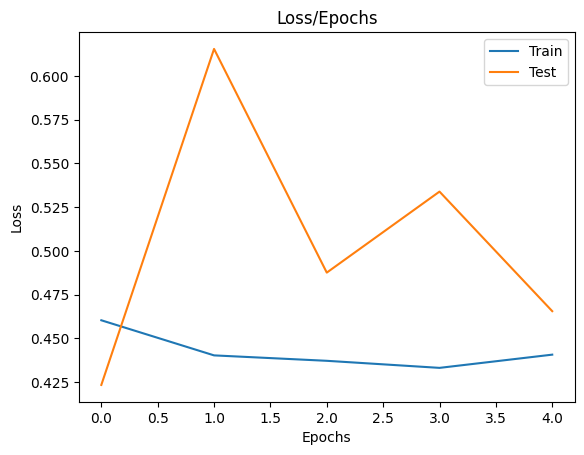

In [51]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Loss/Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])

Same result here, the model need to pass more epochs of training, in other words it is underfitted.

In [52]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
training = model.fit(train, labels_train, epochs=10, validation_split=0.2)
training

Epoch 1/10
1500/1500 [==============================] - 11s 6ms/step - loss: 0.4452 - accuracy: 0.8545 - val_loss: 0.5432 - val_accuracy: 0.8416
Epoch 2/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.4366 - accuracy: 0.8556 - val_loss: 0.4693 - val_accuracy: 0.8470
Epoch 3/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.4398 - accuracy: 0.8556 - val_loss: 0.5073 - val_accuracy: 0.8519
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4178 - accuracy: 0.8593 - val_loss: 0.4817 - val_accuracy: 0.8476
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4253 - accuracy: 0.8566 - val_loss: 0.5792 - val_accuracy: 0.8390
Epoch 6/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.4323 - accuracy: 0.8548 - val_loss: 0.5132 - val_accuracy: 0.8382
Epoch 7/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.4272 - accuracy: 0.8579 - val_loss: 0.5161 - val_accu

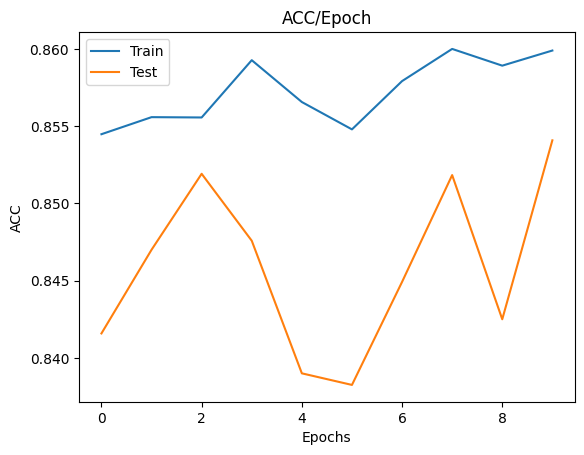

In [53]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('ACC/Epoch')
plt.xlabel('Epochs')
plt.ylabel('ACC')
plt.legend(['Train', 'Test'])

The acc behavior did't differ too much from the previous plot.

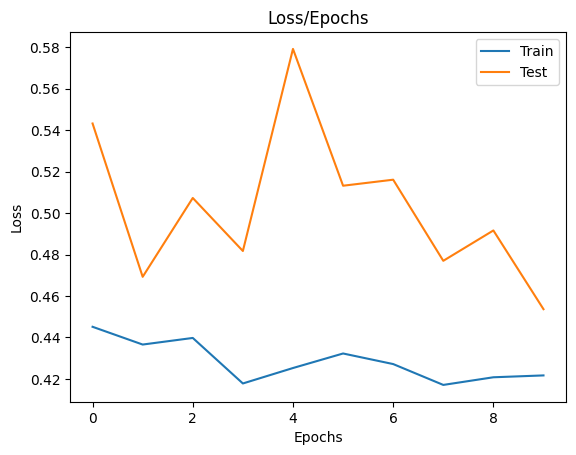

In [54]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Loss/Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])

The loss decreased a bit, but the validation loss increased. This is a warning that allerts one about overfitting.

Something must be done to avoid the overfitting.

#Saving the model from overfitting

The excess retention of information might be contributing to the overfitting. Using a dropout, which inactivates part of the hidden layer one can improve the model performance. The dropout is also known as a second normalization. Since 10 epochs made the model overfit, one will be using 5 epochs.

In [55]:
train= train/255.0

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(len(Classes_names), activation=tensorflow.nn.softmax)
    ])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
training = model.fit(train, labels_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 13s 8ms/step - loss: 0.5339 - accuracy: 0.8095 - val_loss: 0.4047 - val_accuracy: 0.8518
Epoch 2/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3986 - accuracy: 0.8543 - val_loss: 0.3777 - val_accuracy: 0.8588
Epoch 3/5
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3612 - accuracy: 0.8673 - val_loss: 0.3475 - val_accuracy: 0.8783
Epoch 4/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3396 - accuracy: 0.8750 - val_loss: 0.3404 - val_accuracy: 0.8797
Epoch 5/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3234 - accuracy: 0.8813 - val_loss: 0.3364 - val_accuracy: 0.8801


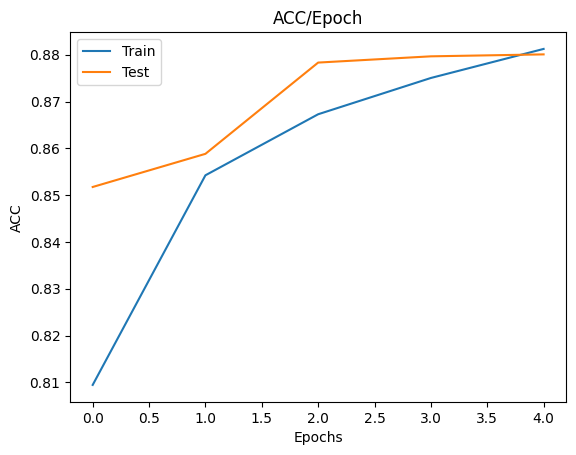

In [56]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('ACC/Epoch')
plt.xlabel('Epochs')
plt.ylabel('ACC')
plt.legend(['Train', 'Test'])

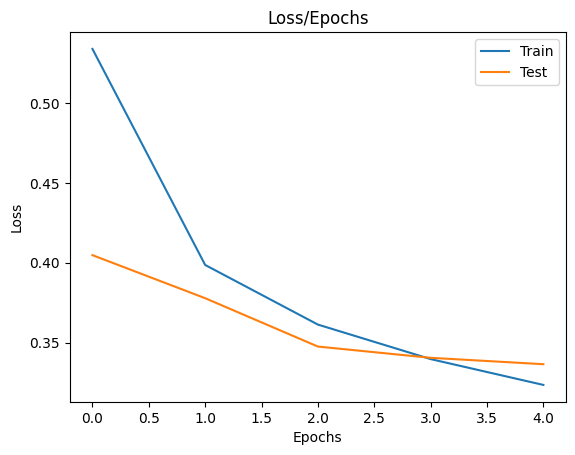

In [57]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Loss/Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])

The model is improved and now one wants to save it for latter use. Note that both losses and ACCs are having a convergence, this is what one was ooking for.

In [58]:
'''from tensorflow.keras.models import load_model
model.save('model_fashion_mnist.h5')
model_saved = load_model('model_fashion_mnist.h5')'''

"from tensorflow.keras.models import load_model\nmodel.save('model_fashion_mnist.h5')\nmodel_saved = load_model('model_fashion_mnist.h5')"

# Model summary

In [59]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


The number of parameters is defined by the number of neurons in the previous layer multiplied by the number of neurons in the current layer. So, the number of params in layer 1 is zero, since there are no layers before it, and the number of params in layer 2 will be 784*256=200704 params. There is a discrepancy in the parameters obtained by the summary() function of this model. The same also happens to layer 4.
This does not mean that the model is wrong. In neural networks, the parameters of the neurons have also weights, which are counted by the same number of neurons in that layer. If one does (784*256)+256 = 200960. The same also happens to layer 4.
Layer 3 is a Dropout regularization technique used to prevent overfitting in neural networks. During training, dropout randomly sets a fraction of input units to zero at each update, which helps in reducing the interdependencies between the neurons. However, during inference or prediction, dropout is turned off, and all the neurons are used. The dropout layer does not have any trainable parameters because it does not learn or adjust any weights. The zero parameters in the dropout layer indicate that it does not contribute to the total number of trainable parameters in the model.

In [60]:
#weights of the first layer
weights_flatten1= model.layers[0].get_weights()
weights_flatten1

[]

In [62]:
weights_dense= model.layers[1].get_weights()
bias_dense = model.layers[1].get_weights()[1]
weights_dense

[array([[ 0.04073843, -0.08992647, -0.0160919 , ...,  0.09202661,
         -0.05326033, -0.08352499],
        [-0.1385231 ,  0.01162198, -0.07940623, ..., -0.02182715,
          0.11984555, -0.12626825],
        [-0.2241355 ,  0.17375526, -0.01374662, ..., -0.04423836,
         -0.05174765, -0.04356382],
        ...,
        [ 0.03374136,  0.143604  ,  0.02579149, ...,  0.03059612,
          0.13234892,  0.13204792],
        [-0.06961011,  0.0943289 , -0.01228345, ..., -0.00060088,
          0.04415588,  0.3169902 ],
        [-0.00068278,  0.14359684, -0.16873375, ...,  0.15199792,
         -0.05722673, -0.06232969]], dtype=float32),
 array([ 3.78811620e-02,  7.80106708e-02,  2.51763701e-01, -3.49919721e-02,
         2.34758034e-01, -4.90211919e-02, -1.59497727e-02, -1.62909701e-02,
        -8.62449966e-03,  7.39435479e-02, -1.57792032e-01,  3.16687971e-01,
        -1.02341883e-01, -2.45950341e-01,  4.06724572e-01,  3.04186046e-01,
        -2.87316173e-01, -2.53802598e-01,  3.84539180e

Deep learning is based on matrice multiplication. The weights are made of an array with another array. The first array contains the weights and the second array contains the bias of the model. The bias will define if the model is biased by an image of clothes that are almost the same or will make confusion and mistake in the classification. As an example, the model classifies a skirt as a dress.

In [ ]:
weights_droput= model.layers[2].get_weights()
weights_dense2= model.layers[3].get_weights()

## The effect of weight=0

In [63]:
print(weights_dense[0].shape)
#making the weight=0
weight_zero= np.zeros(weights_dense[0].shape)
weight_zero

(784, 256)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [65]:
model.layers[1].set_weights([weight_zero, bias_dense])

In [67]:
model.layers[1].get_weights()

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([ 3.78811620e-02,  7.80106708e-02,  2.51763701e-01, -3.49919721e-02,
         2.34758034e-01, -4.90211919e-02, -1.59497727e-02, -1.62909701e-02,
        -8.62449966e-03,  7.39435479e-02, -1.57792032e-01,  3.16687971e-01,
        -1.02341883e-01, -2.45950341e-01,  4.06724572e-01,  3.04186046e-01,
        -2.87316173e-01, -2.53802598e-01,  3.84539180e-02,  7.85495862e-02,
         3.64806540e-02, -1.58371963e-02,  1.96561053e-01, -1.90738693e-01,
         1.50711581e-01,  3.36449355e-01,  2.91652471e-01,  1.31238431e-01,
         1.44150272e-01, -6.65845573e-02, -1.82453901e-01, -2.09441319e-01,
         1.51585728e-01,  4.01596464e-02,  3.30503523e-01,  3.69900540e-02,
        -1.94446705e-02,  1.09381817e-01,  1.3765558

## Weight zero model execution

In [68]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
training = model.fit(train, labels_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5386 - accuracy: 0.8052 - val_loss: 0.4327 - val_accuracy: 0.8416
Epoch 2/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.4050 - accuracy: 0.8522 - val_loss: 0.3704 - val_accuracy: 0.8664
Epoch 3/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3735 - accuracy: 0.8626 - val_loss: 0.4009 - val_accuracy: 0.8501
Epoch 4/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.3523 - accuracy: 0.8703 - val_loss: 0.3630 - val_accuracy: 0.8644
Epoch 5/5
1500/1500 [==============================] - 11s 8ms/step - loss: 0.3345 - accuracy: 0.8764 - val_loss: 0.3385 - val_accuracy: 0.8773


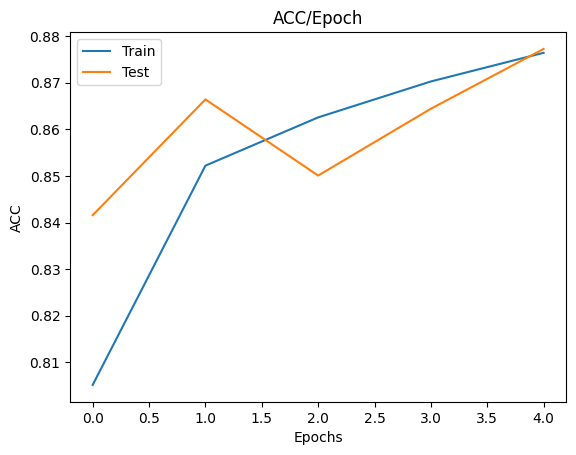

In [69]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('ACC/Epoch')
plt.xlabel('Epochs')
plt.ylabel('ACC')
plt.legend(['Train', 'Test'])

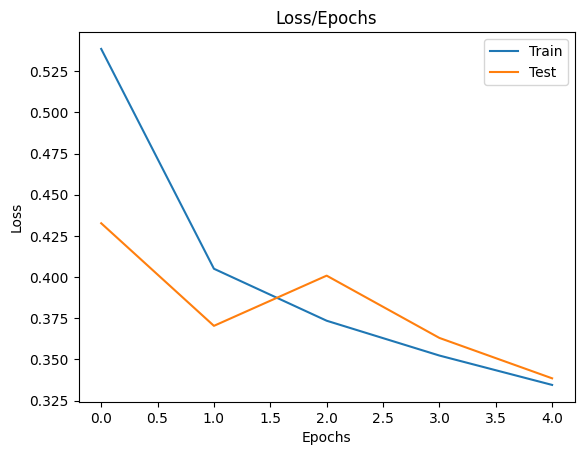

In [70]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Loss/Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])

Using 5 epochs and weight=0 on layer dense [1], one can see that the train accuracy behavior performed ok, while the test had a spike. This is again an overfitted model, that was fixed after epochs 3 and 4. The same behavior is observed in the loss plot. the final result is still good since the model is converging train and test to the same value in both plots.

So the effect of weight=0 in a single layer of the neural network causes a decrease in its performance since the network will not know how to define what is the better classification option. When all neurons have the same weight values, they have symmetry and this is not what one wants to its model. It is necessary to break that symmetry to get better results.

## Using random numbers as weights

In [79]:
weight_rng= np.random.rand(784,256)
model.layers[1].set_weights([weight_rng, bias_dense])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
training = model.fit(train, labels_train, epochs=5, validation_split=0.2)

plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('ACC/Epoch')
plt.xlabel('Epochs')
plt.ylabel('ACC')
plt.legend(['Train', 'Test'])

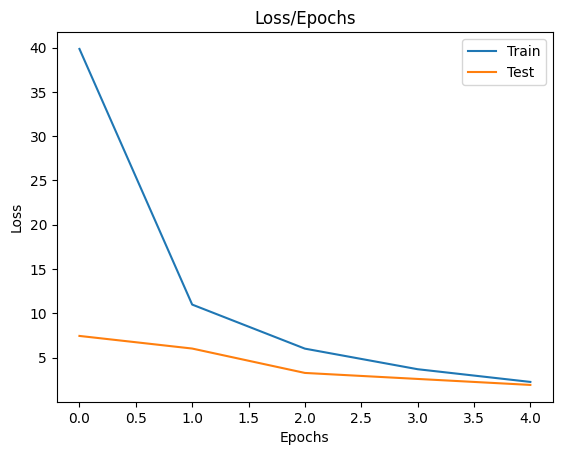

In [82]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Loss/Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])

Sometimes the model can perform almost like the standard model. In this random number generation, without any seed, the acc plot got worse, and on the loss, it also got worse. Now it is sure that the weights are not equal and got worse. starting with all weights as 0 makes the model slower. With rng weights, there could be values that are too big and values that are too low. Those big values creates the effect of exploding gradients, while small values tend to make small changes in the model and this will result in a vanishing gradient problem.

The next question to answer is what is happening to the model when one of those problems happens.

In [83]:
model.get_config()

{'name': 'sequential_3',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_3_input'}},
  {'class_name': 'Flatten',
   'config': {'name': 'flatten_3',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_6',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout_1',
    'trainable': True,
    'dtype': 'float32',
  

'kernel_initializer': {'class_name': 'GlorotUniform'

This is the algorithm that starts the model with weights that works like a mean, but it makes a distribution of values to the weights. This creates uniformity but not a symmetry in the weight's values.

# Understanding bias and the change in the classification

Same proccess as before, bias=0 and bias=Random.

Epoch 1/5
1500/1500 [==============================] - 12s 7ms/step - loss: 2.8687 - accuracy: 0.1001 - val_loss: 2.5436 - val_accuracy: 0.0995
Epoch 2/5
1500/1500 [==============================] - 13s 8ms/step - loss: 2.4152 - accuracy: 0.1001 - val_loss: 2.3391 - val_accuracy: 0.0995
Epoch 3/5
1500/1500 [==============================] - 10s 7ms/step - loss: 2.3156 - accuracy: 0.1001 - val_loss: 2.3049 - val_accuracy: 0.0995
Epoch 4/5
1500/1500 [==============================] - 8s 6ms/step - loss: 2.3032 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.0995
Epoch 5/5
1500/1500 [==============================] - 9s 6ms/step - loss: 2.3028 - accuracy: 0.0980 - val_loss: 2.3027 - val_accuracy: 0.0983


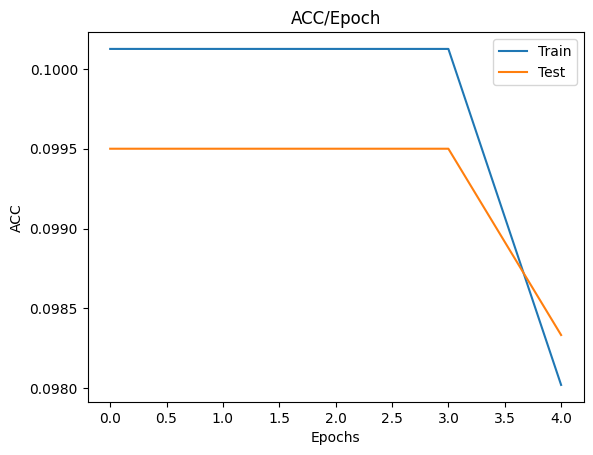

In [85]:
bias_dense = model.layers[1].get_weights()[1]
bias_dense_zero = np.zeros(bias_dense.shape)
bias_dense_rng= np.random.rand(256,)

model.layers[1].set_weights([weight_zero, bias_dense_zero])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
training = model.fit(train, labels_train, epochs=5, validation_split=0.2)

plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('ACC/Epoch')
plt.xlabel('Epochs')
plt.ylabel('ACC')
plt.legend(['Train', 'Test'])

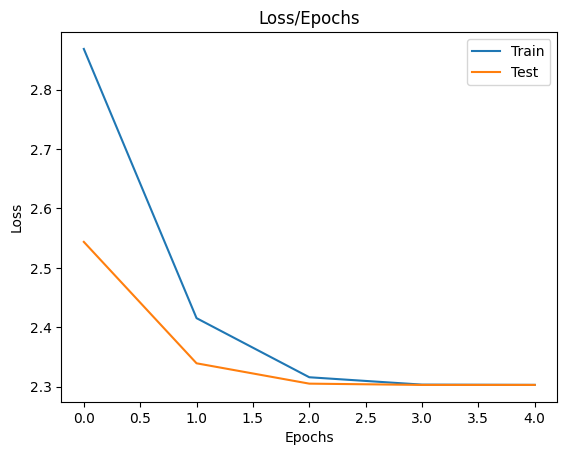

In [86]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Loss/Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])

## Random bias

Epoch 1/5
1500/1500 [==============================] - 12s 7ms/step - loss: 18.7838 - accuracy: 0.3770 - val_loss: 5.4182 - val_accuracy: 0.5027
Epoch 2/5
1500/1500 [==============================] - 11s 7ms/step - loss: 5.4625 - accuracy: 0.5567 - val_loss: 2.4805 - val_accuracy: 0.6993
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 3.5089 - accuracy: 0.6341 - val_loss: 3.3633 - val_accuracy: 0.6559
Epoch 4/5
1500/1500 [==============================] - 8s 6ms/step - loss: 2.5043 - accuracy: 0.6851 - val_loss: 1.3178 - val_accuracy: 0.7684
Epoch 5/5
1500/1500 [==============================] - 10s 7ms/step - loss: 1.5869 - accuracy: 0.7329 - val_loss: 1.0823 - val_accuracy: 0.8078


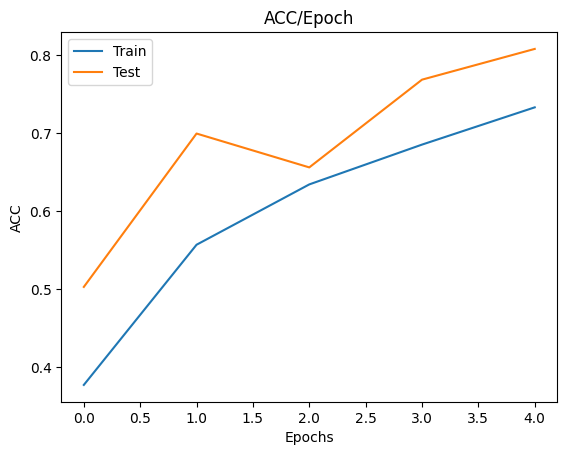

In [87]:
bias_dense_rng= np.random.rand(256,)

model.layers[1].set_weights([weight_rng, bias_dense_rng])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
training = model.fit(train, labels_train, epochs=5, validation_split=0.2)

plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('ACC/Epoch')
plt.xlabel('Epochs')
plt.ylabel('ACC')
plt.legend(['Train', 'Test'])

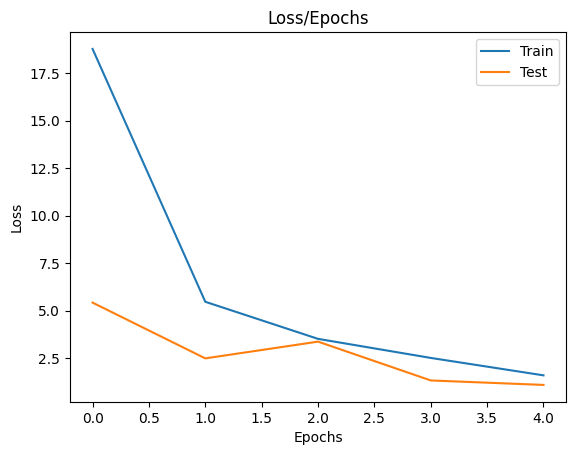

In [88]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Loss/Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])

Initially, one can see that the acc values were the worst ever found in this notebook. Weight and bias = 0 created that effect. However, the loss of the model was ok, but this was also higher than the normal model. Now the performance and the results of the model were broken.

Based on the rng bias and weights, the results were also rng, so worst than the result of the normal model for both, acc and loss. The only good thing that happened here was the convergence of the train and test on all graphics, showing that the model is evolving, although the weights and bias make that harder.

Considering that this model is for clothes classification the separation of the classes must be clear. If the function that divides class A and class B, separates those classes with low bias, this means that those classes are closer to the best function for separating A and B. It is important to note that a model with higher bias tends to make a clear distinction between the classes, but can also miss classify similar classes.
On the other hand, weights ponder and get altered to make the classes closer to the best function that separates them.

# Understanding the ReLU function

Rectified Linear UnitIt is a simple and effective non-linear function that introduces non-linearity to the network, allowing it to learn and model complex relationships in the data.

Non-linearity: ReLU introduces non-linearity to the network, allowing it to learn and model complex patterns and relationships in the data. This is crucial for capturing the intricacies of real-world problems.

Sparse activation: ReLU neurons are either completely "on" (outputting a positive value) or "off" (outputting zero). This sparsity encourages the network to be more selective about which features it activates, making the representations more efficient.

Avoiding the vanishing gradient problem: During training, deep neural networks use a technique called backpropagation to update the model's parameters. ReLU helps alleviate the vanishing gradient problem by providing a non-zero gradient for positive inputs, which helps propagate gradients and improve learning in deep networks.

It's important to note that ReLU can also have some limitations. For example, ReLU neurons can "die" during training, where they become permanently inactive and output zero for all inputs. To address this issue, variants of ReLU, such as Leaky ReLU, Parametric ReLU, and Exponential ReLU, have been proposed to overcome the drawbacks of the original ReLU function.

Overall, ReLU is a fundamental activation function in deep learning that enables neural networks to model complex relationships and address the challenges associated with deep architectures.

In this model, ReLu will work like this:
In the layer dense = ReLu(dot(input, weights)+bias)

# Finding the optimal deeps

While training the model one can expect the model to learn faster and the model will need more epochs to find the optimal loss value. Using learning rates that are too low, will consume more time and computational power. As one saw before the Glorot Uniformitty reinforces equilibrium and this is also required to find the lowest point in the valley of learning.

One can use Gradient descending which finds the deepest point using momentum instead of learning rate. Remember that the world contains more than one valley. Some of these valleys could be deep, but not the deepest in the world, or a global point of view.

This model has a dropout layer which keeps the model in a single valley, while using the adam optimizer. The challenge now is to find the global minimum using the Stochastic Gradient Descent optimizer.

In [3]:
adam = keras.optimizers.Adam(lr=0.9) #increased learning rate

model_high_lr = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dense(len(Classes_names), activation=tensorflow.nn.softmax)
    ])

model_high_lr.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
training = model_high_lr.fit(train, labels_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 16s 10ms/step - loss: 4.7146 - accuracy: 0.7261 - val_loss: 0.7337 - val_accuracy: 0.7694
Epoch 2/5
1500/1500 [==============================] - 8s 6ms/step - loss: 0.6229 - accuracy: 0.7839 - val_loss: 0.6521 - val_accuracy: 0.7853
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5669 - accuracy: 0.8073 - val_loss: 0.6806 - val_accuracy: 0.7900
Epoch 4/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5257 - accuracy: 0.8199 - val_loss: 0.6037 - val_accuracy: 0.8184
Epoch 5/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5085 - accuracy: 0.8260 - val_loss: 0.5493 - val_accuracy: 0.8142


In [4]:
adam = keras.optimizers.Adam(lr=0.001) #normal learning rate

model_normal_lr = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dense(len(Classes_names), activation=tensorflow.nn.softmax)
    ])

model_normal_lr.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
training = model_normal_lr.fit(train, labels_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 9s 6ms/step - loss: 4.6980 - accuracy: 0.7195 - val_loss: 0.8369 - val_accuracy: 0.7659
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.6730 - accuracy: 0.7707 - val_loss: 0.6056 - val_accuracy: 0.8083
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5652 - accuracy: 0.8067 - val_loss: 0.5855 - val_accuracy: 0.7975
Epoch 4/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5268 - accuracy: 0.8194 - val_loss: 0.5190 - val_accuracy: 0.8234
Epoch 5/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4960 - accuracy: 0.8304 - val_loss: 0.5118 - val_accuracy: 0.8264


As an example using the default learning rate of 0.001 one can see that all the evaluation values were better. The model lost less information.

What about the other Hyperparamethers?

In [5]:
adam = keras.optimizers.Adam(lr=0.001) #normal learning rate

model_batch = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dense(len(Classes_names), activation=tensorflow.nn.softmax)
    ])

model_batch.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
training = model_batch.fit(train, labels_train, epochs=5, validation_split=0.2,
                               batch_size=480) #using samples/100

Epoch 1/5
100/100 [==============================] - 4s 30ms/step - loss: 15.1092 - accuracy: 0.7300 - val_loss: 5.2800 - val_accuracy: 0.7833
Epoch 2/5
100/100 [==============================] - 2s 18ms/step - loss: 4.5134 - accuracy: 0.7961 - val_loss: 4.2191 - val_accuracy: 0.7851
Epoch 3/5
100/100 [==============================] - 2s 18ms/step - loss: 3.1335 - accuracy: 0.8160 - val_loss: 3.1567 - val_accuracy: 0.7893
Epoch 4/5
100/100 [==============================] - 2s 18ms/step - loss: 2.4044 - accuracy: 0.8242 - val_loss: 2.3278 - val_accuracy: 0.8241
Epoch 5/5
100/100 [==============================] - 2s 17ms/step - loss: 1.9730 - accuracy: 0.8335 - val_loss: 2.0548 - val_accuracy: 0.8199


One got less time on the training process, using the standard learning rate, but 100 times less data (480). The result was low time consumed at the cost of higher loss values.

This process of changing and testing the hyperparameters is called hyperparameter tunning. A way to automate that proccess is using callbacks.

## Automating optimization

In [2]:
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss'), #stops the model when val_loss will increase os is equal
             keras.callbacks.ModelCheckpoint(filepath ='best_model.hdf5',
                                             monitor='val_loss', save_best_only=True)] #saves the model

adam = keras.optimizers.Adam(lr=0.001) #normal learning rate

model_callback = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dense(len(Classes_names), activation=tensorflow.nn.softmax)
    ])

model_callback.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
training = model_callback.fit(train, labels_train, epochs=15, #increased to see the limit
                              validation_split=0.2,
                               batch_size=480,#using samples/100
                              callbacks=callbacks) #using val_loss early stop callback

Epoch 1/15
100/100 [==============================] - 5s 38ms/step - loss: 18.2012 - accuracy: 0.7131 - val_loss: 5.5749 - val_accuracy: 0.7790
Epoch 2/15
100/100 [==============================] - 3s 29ms/step - loss: 4.1913 - accuracy: 0.7946 - val_loss: 3.5817 - val_accuracy: 0.7958
Epoch 3/15
100/100 [==============================] - 1s 14ms/step - loss: 2.8767 - accuracy: 0.8099 - val_loss: 2.8734 - val_accuracy: 0.8078
Epoch 4/15
100/100 [==============================] - 1s 14ms/step - loss: 2.0688 - accuracy: 0.8216 - val_loss: 2.1857 - val_accuracy: 0.8123
Epoch 5/15
100/100 [==============================] - 1s 14ms/step - loss: 1.5544 - accuracy: 0.8290 - val_loss: 1.7645 - val_accuracy: 0.8138
Epoch 6/15
100/100 [==============================] - 1s 14ms/step - loss: 1.1089 - accuracy: 0.8336 - val_loss: 1.2997 - val_accuracy: 0.8119
Epoch 7/15
100/100 [==============================] - 1s 15ms/step - loss: 0.8450 - accuracy: 0.8295 - val_loss: 1.0966 - val_accuracy: 0.811

So Epoch 13 is the limit based on val_loss.

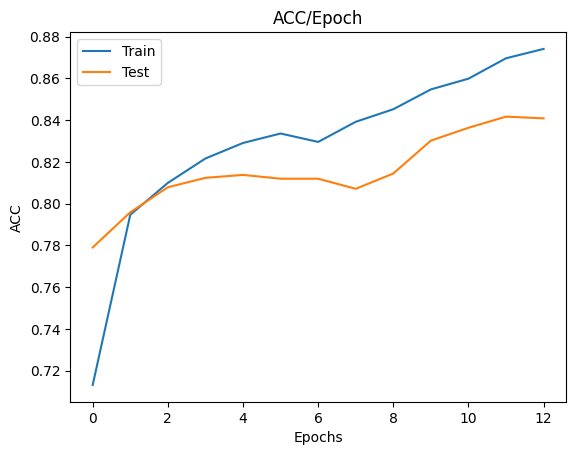

In [3]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('ACC/Epoch')
plt.xlabel('Epochs')
plt.ylabel('ACC')
plt.legend(['Train', 'Test'])

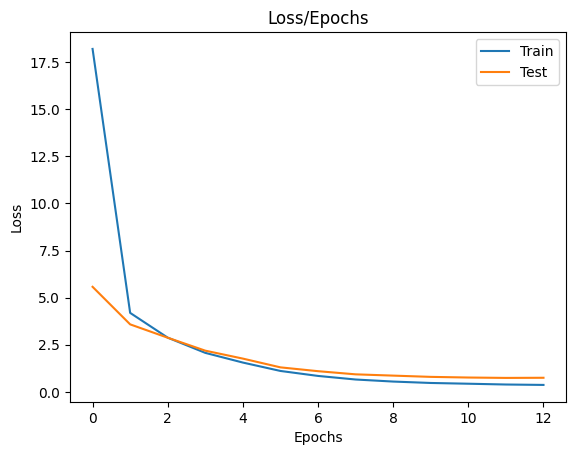

In [4]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Loss/Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])

The model converged!